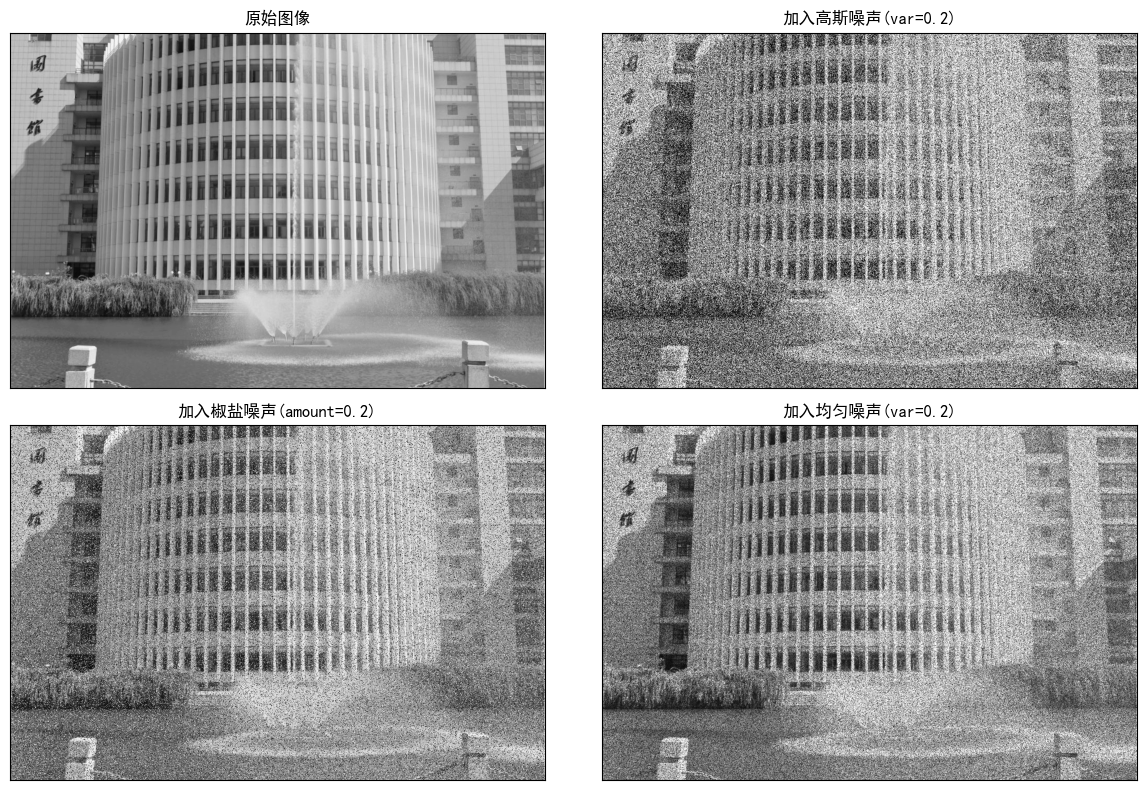

In [4]:
from skimage import util
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 读取图像
img1 = Image.open("D:/picture/school.png").convert('L')  # 转换为灰度图像
img = np.array(img1)

# 添加高斯噪声
noisy_gaussian = util.random_noise(img, mode='gaussian', mean=0, var=0.2)

# 添加椒盐噪声
noisy_salt_pepper = util.random_noise(img, mode='s&p', amount=0.2)

# 添加均匀噪声（使用 speckle 模拟）
noisy_uniform = util.random_noise(img, mode='speckle', mean=0, var=0.2)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 显示结果
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.title('原始图像')
plt.xticks([])   # 移除刻度
plt.yticks([])
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.title('加入高斯噪声(var=0.2)')
plt.xticks([])   # 移除刻度
plt.yticks([])
plt.imshow(noisy_gaussian, cmap='gray')

plt.subplot(223)
plt.title('加入椒盐噪声(amount=0.2)')
plt.xticks([])   # 移除刻度
plt.yticks([])
plt.imshow(noisy_salt_pepper, cmap='gray')

plt.subplot(224)
plt.title('加入均匀噪声(var=0.2)')
plt.xticks([])   # 移除刻度
plt.yticks([])
plt.imshow(noisy_uniform, cmap='gray')

plt.tight_layout()
plt.show()


马文静


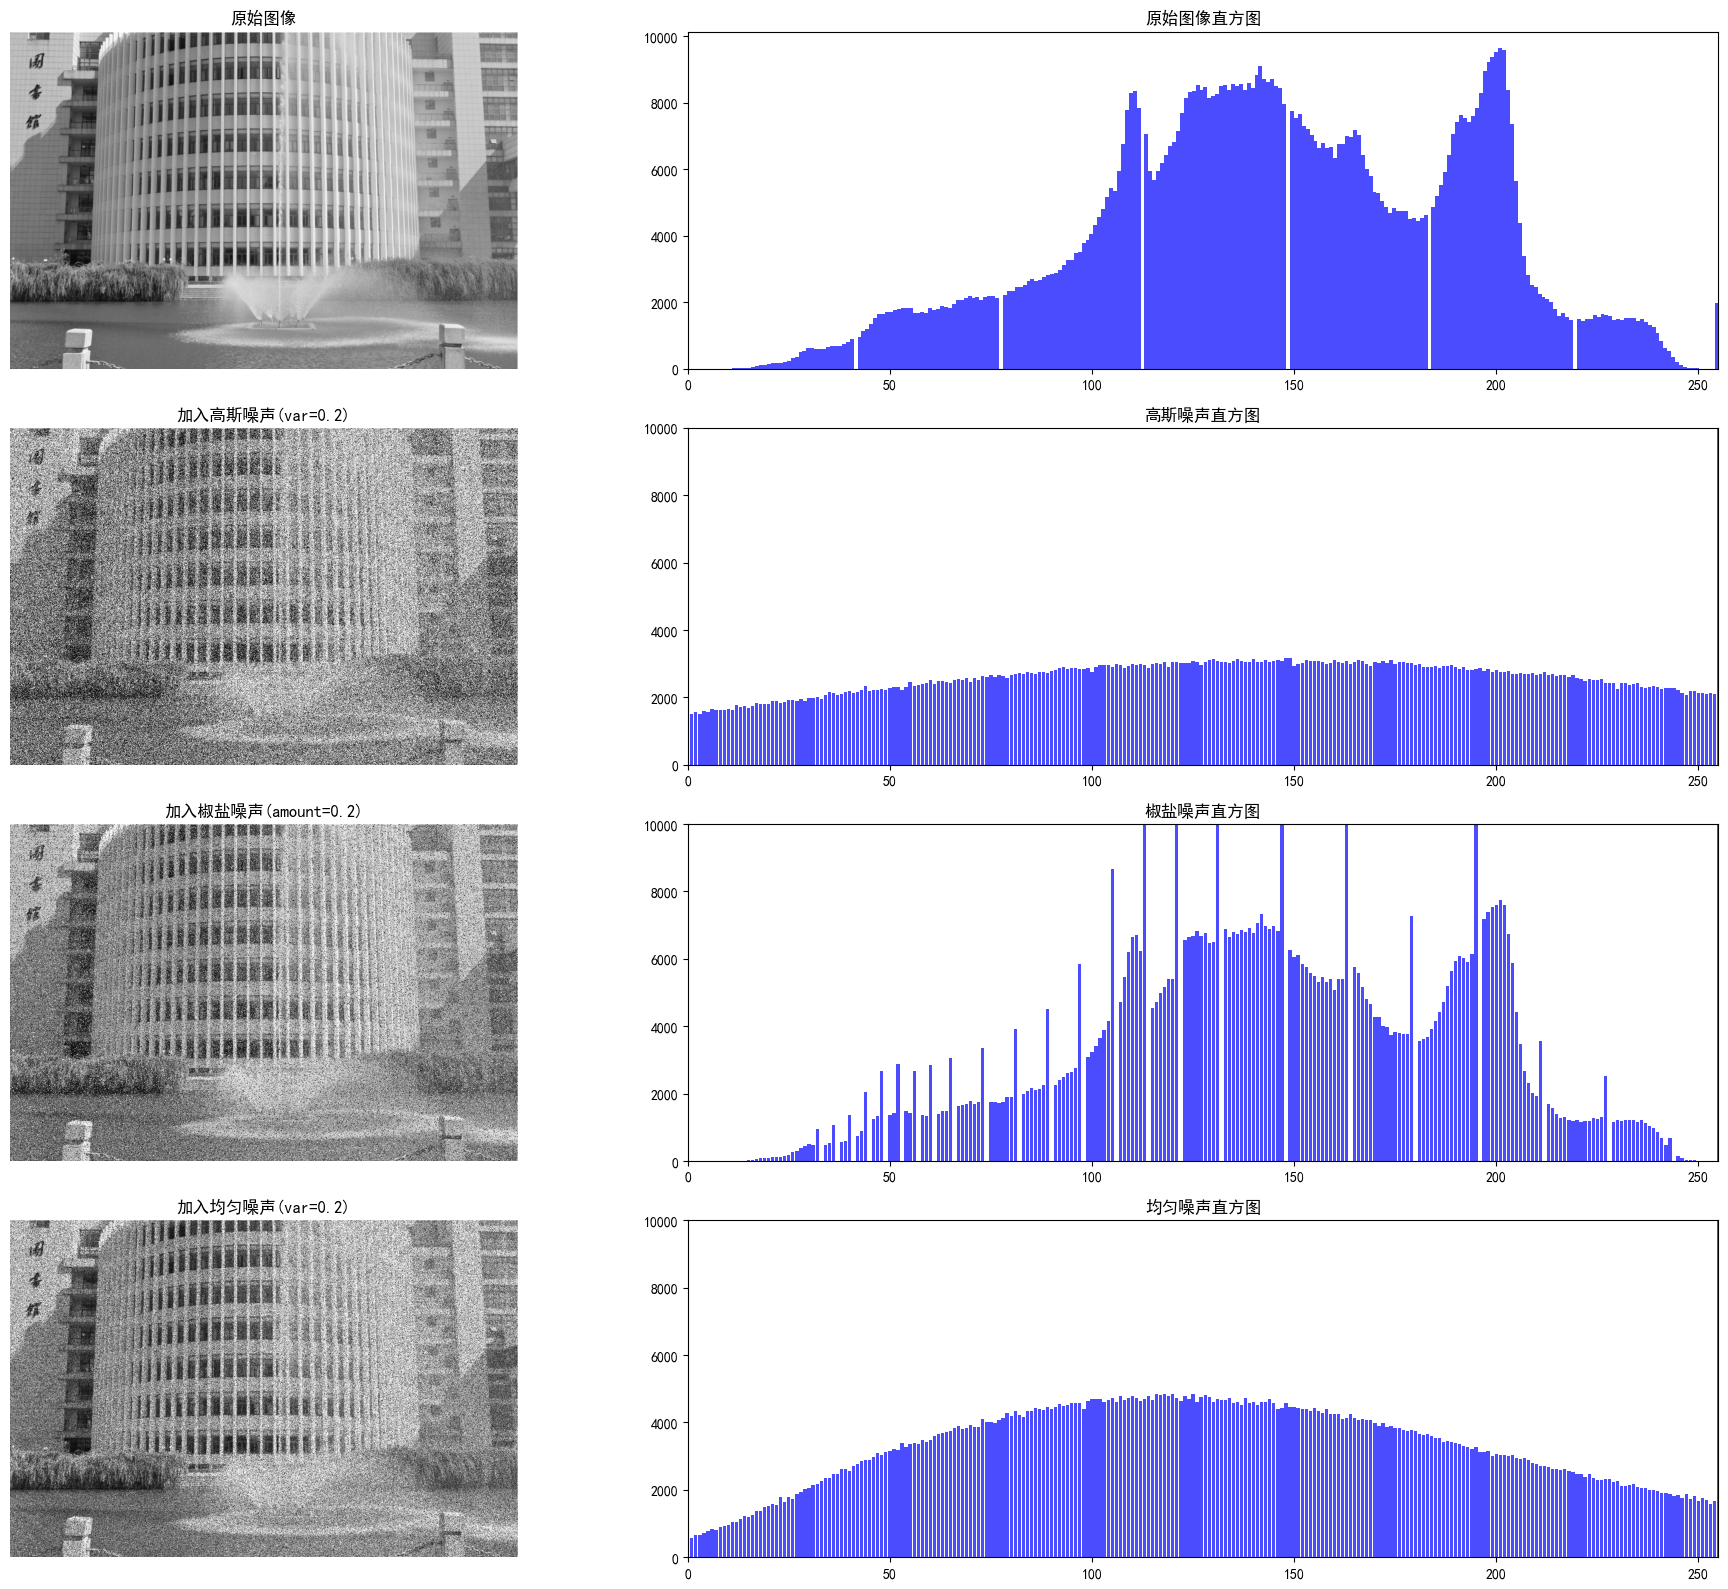

In [14]:
from skimage import util
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import collections
import cv2

# 计算灰度图的直方图
def draw_histogram(grayscale):
    gray_key = []
    gray_count = []
    gray_result = []
    histogram_gray = list(grayscale.ravel())  # 将多维数组转换成一维数组
    gray = dict(collections.Counter(histogram_gray))  # 统计图像中每个灰度级出现的次数
    gray = sorted(gray.items(), key=lambda item: item[0])  # 根据灰度级大小排序
    for element in gray:
        key = list(element)[0]
        count = list(element)[1]
        gray_key.append(key)
        gray_count.append(count)
    for i in range(0, 256):
        if i in gray_key:
            num = gray_key.index(i)
            gray_result.append(gray_count[num])
        else:
            gray_result.append(0)
    gray_result = np.array(gray_result)
    return gray_result
x = []
for i in range(0, 256):  # 横坐标
    x.append(i)


#读取图像
original = cv2.imread("D:/picture/school.png")
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)   #将图像从RGB颜色空间转换到灰度颜色空间

# 添加噪声
noisy_gaussian = util.random_noise(original_gray, mode='gaussian', mean=0, var=0.2)
noisy_salt_pepper = util.random_noise(original_gray, mode='s&p', amount=0.2)
noisy_uniform = util.random_noise(original_gray, mode='speckle', mean=0, var=0.2)




# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 显示图像及直方图
plt.figure(figsize=(20, 16))
# 原始图像及其直方图
plt.subplot(4, 2, 1)
plt.title('原始图像')
plt.imshow(original_gray, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.title('原始图像直方图')
plt.hist(original_gray.ravel(), bins=256, color='blue', alpha=0.7)
plt.xlim(0, 255)

# 高斯噪声图像及其直方图
plt.subplot(4, 2, 3)
plt.title('加入高斯噪声(var=0.2)')
plt.imshow(noisy_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.title('高斯噪声直方图')
gray_result_gaussian = draw_histogram((noisy_gaussian * 255).astype(np.uint8))
plt.bar(range(256), gray_result_gaussian, color='blue', alpha=0.7)
plt.xlim(0, 255)
plt.ylim(0, 10000)

# 椒盐噪声图像及其直方图
plt.subplot(4, 2, 5)
plt.title('加入椒盐噪声(amount=0.2)')
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.title('椒盐噪声直方图')
gray_result_salt_pepper = draw_histogram((noisy_salt_pepper * 255).astype(np.uint8))
plt.bar(range(256), gray_result_salt_pepper, color='blue', alpha=0.7)
plt.xlim(0, 255)
plt.ylim(0, 10000)

# 均匀噪声图像及其直方图
plt.subplot(4, 2, 7)
plt.title('加入均匀噪声(var=0.2)')
plt.imshow(noisy_uniform, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.title('均匀噪声直方图')
gray_result_uniform = draw_histogram((noisy_uniform * 255).astype(np.uint8))
plt.bar(range(256), gray_result_uniform, color='blue', alpha=0.7)
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.tight_layout()
plt.show()
